# 1. Pytorch Tensors

En este notebook aprenderemos a cerca de los tensores de Pytorch, un concepto a conocer que resulta imprescindible a la hora de trabajar con la librería. Son muy útiles ya que es donde guarda la información Pytorch, por lo tanto, deberemos saber manejarlos de cara a abordar cualquier tarea. Al final de este notebook sabrás como maneja la información el framework Pytorch y también como crear y manipular estos datos.

## ¿Qué es un tensor?

Pytorch es una librería que ofrece arrays multidimensionales, más bien conocidos como **tensors**, y para los cuales proporciona muchísimos métodos que permitan manejarlos y trabajar con ellos. 

En un proyecto de Pytorch, normalmente lo que haremos será cargar los datos en tensores y trabajar con estos tensores en el proceso de entrenamiento en adelante. En la siguiente imagen se muestra el papel que juegan estos tensores en el ciclo de vida de un proyecto basado en Pytorch:

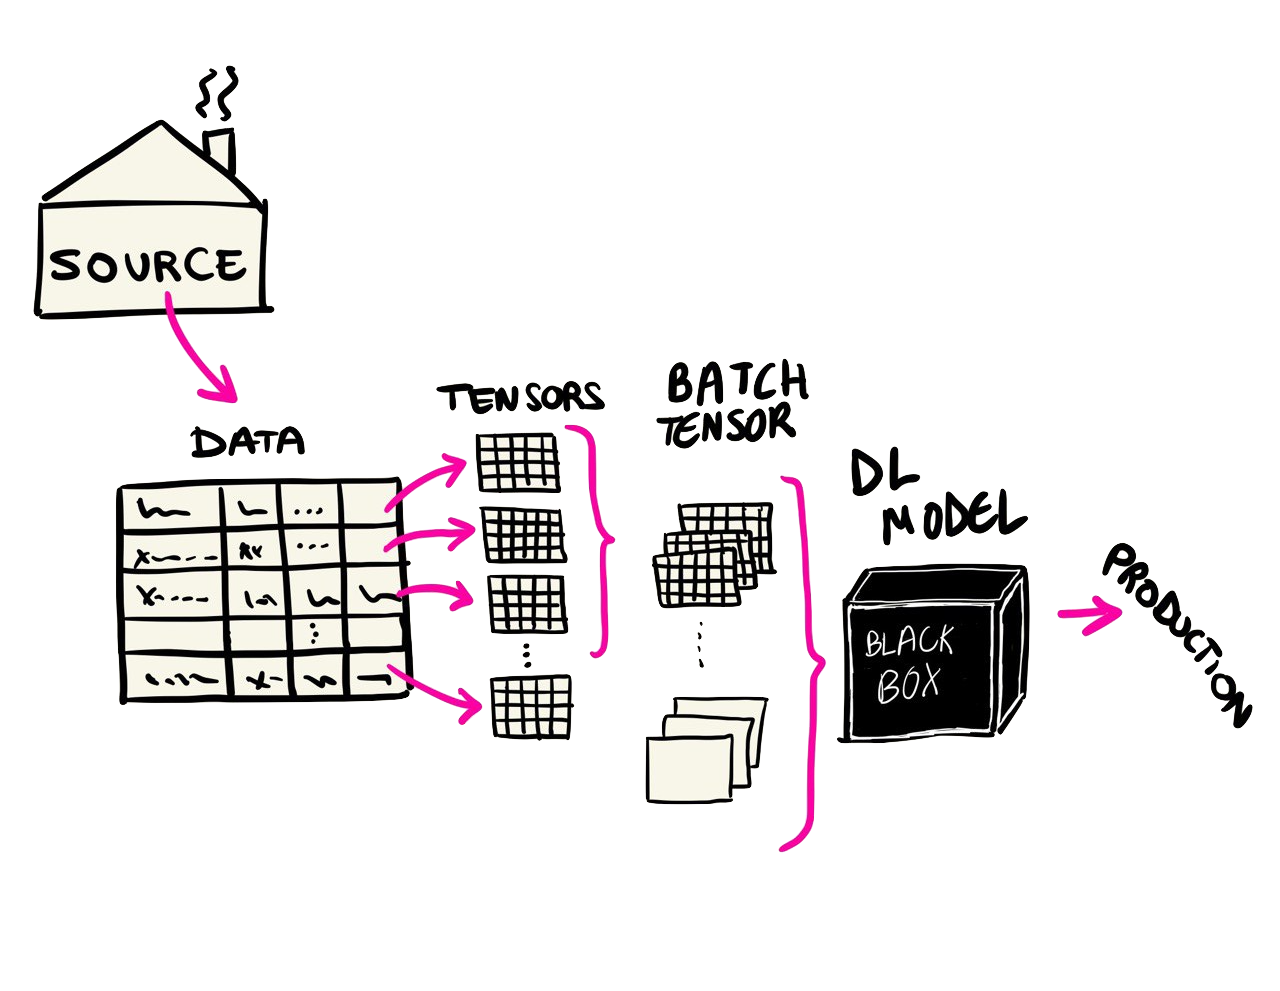

## Crear nuevos tensores

Como hemos mencionado previamente, Pytorch maneja y guarda la información en los llamados **tensores** de Pytorch. Los tensores son una generalización de los vectores y matrices a arrays multidimensionales. Operar con tensores de Pytorch es muy similar a operar con tensores de numpy. De esta forma, veremos que muchas operaciones o formas de trabajar se pueden realizar de la misma manera aquí. La documentación está en este [link](https://pytorch.org/docs/stable/tensors.html).

In [1]:
import torch # Importamos el módulo de Pytorch
ones = torch.ones(5) # Creamos un vector de 5 componentes cuyo valor es '1'
ones

tensor([1., 1., 1., 1., 1.])

In [2]:
zeros = torch.zeros((5,5)) # Un vector/matriz de '0' puede ser una forma adecuada de inicialización
print("Matriz de ceros: \n", zeros)

# Construimos una matriz por columnas a partir de esta matriz de ceros
for i in range(len(zeros)):
    zeros[:,i] = i + 1

print("Nueva matriz: \n", zeros)

Matriz de ceros: 
 tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
Nueva matriz: 
 tensor([[1., 2., 3., 4., 5.],
        [1., 2., 3., 4., 5.],
        [1., 2., 3., 4., 5.],
        [1., 2., 3., 4., 5.],
        [1., 2., 3., 4., 5.]])


También podemos crear un tensor de Pytorch a partir de una lista (o de un array de numpy):

In [3]:
list_ = [1.0, 3.0, 5.0, 2.0, 9.0, 0.0]
tensor = torch.tensor(list_)
tensor

tensor([1., 3., 5., 2., 9., 0.])

In [4]:
list_ = [[1.0, 3.0, 5.0], [2.0, 9.0, 0.0]] # Podemos añadirle dimensiones
tensor = torch.tensor(list_)
tensor

tensor([[1., 3., 5.],
        [2., 9., 0.]])

> **Ejercicio 1:** Define un tensor en Pytorch que represente una matriz de tamaño 6x6 cuyos elementos vayan de menor a mayor por filas. Si quieres, puedes usar funciones de pytorch 😉

In [15]:
lista = list(range(0, 36))

tensor = torch.tensor(lista).reshape((6,6))

tensor


tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11],
        [12, 13, 14, 15, 16, 17],
        [18, 19, 20, 21, 22, 23],
        [24, 25, 26, 27, 28, 29],
        [30, 31, 32, 33, 34, 35]])

## Indexación de tensores

Podemos usar la misma indexación que en Numpy. Esto será útil para extraer subtensores que nos serán útiles para entrenar o comprobar información de los modelos.

In [19]:
some_list = torch.tensor((list(range(6))))
some_list[:]     # <1>
some_list[1:4]   # <2>
some_list[1:]    # <3>
some_list[:4]    # <4>
some_list[:-1]   # <5>
some_list[1:4:2] # <6>

tensor([1, 3])

> **Ejercicio 2:** Transforma el tensor del ejercicio anterior. Recórrelo desde el final hacia delante de 2 en 2.  **PyAyuda**: Puedes usar la función torch.flip()

In [47]:
tensor_reducido = tensor.flip([1])[::2,::2]
tensor_reducido

tensor([[ 5,  3,  1],
        [17, 15, 13],
        [29, 27, 25]])

## Broadcasting

Podemos operar con tensores aunque no tengan la misma dimensión. Podemos sumar un número a una matriz o multiplicar una matriz por un vector. Primero vemos la multiplicación de dos matrices del mismo tamaño, se efectúa elemento a elemento:

In [39]:
matrix = torch.tensor([[1, 2], [3, 4]])
matrix2 = torch.tensor([[5, 6], [7, 8]])
matrix * matrix2 # producto elemento a elemento

tensor([[ 5, 12],
        [21, 32]])

También podemos hacer el producto matricial de estas dos matrices (vivan las matemáticas y el álgebra lineal!!):

In [40]:
torch.mm(matrix, matrix2) # producto matricial

tensor([[19, 22],
        [43, 50]])

Por último vemos que podemos multiplicar un vector y una matriz, en este caso se hace también elemento a elemento, por columnas.

In [41]:
vector = torch.tensor([1, 2]) # producto elemento a elemento en una dimension
vector = vector.unsqueeze(-1)
matrix * vector

tensor([[1, 2],
        [6, 8]])

In [43]:
matrix.shape, vector.shape

(torch.Size([2, 2]), torch.Size([2, 1]))

Si cambiamos las dimensiones del vector podemos hacer la operación por filas.

In [44]:
matrix * vector.view(1, 2) # Usamos view para hacer un 'reshape'

tensor([[1, 4],
        [3, 8]])

> **Ejercicio 3:** A la matriz que creaste en el ejercicio 2 que debería tener dimensión 3x3, multiplícale x2 a las primera fila, x3 a la segundo y x10 a la tercera.

## Tipos de elementos

En Pytorch tenemos distintos tipos de elementos para representar: enteros, punto flotantes, etc.
En el caso de las redes neuronales, se suele usar **float32**, tiene menos precisión que 64-bit pero ganamos en memoria sin un fuerte impacto en la precisión del modelo. Pytorch espera que el indexado se haga con tensores **int64**. Además para indicar si algo está o no presente (booleano) se utilizará el tipo **bool**.

- torch.float32 o torch.float
- torch.float64 o torch.double
- torch.float16 o torch.half
- torch.int8
- torch.uint8
- torch.int16 o torch.short
- torch.int32 o torch.int
- torch.int64 o torch.long
- torch.bool

In [ ]:
vector1 = torch.tensor([1, 1, 1])
vector2 = torch.tensor([1.0, 1.0, 1.0])
vector1.dtype, vector2.dtype

In [ ]:
vector1 = torch.tensor([1, 1, 1], dtype=torch.float64)
vector1

In [ ]:
vector1 = torch.tensor([1, 1, 1], dtype=torch.bool)
vector1, vector1.dtype

In [ ]:
random_vector = torch.randn(3, 3).to(torch.double)
random_vector

> **Ejercicio 4:** Crea dos matriz randoms M1 y M2 de la misma dimensión que la resultante del ejercicio anterior, y construye una nueva matriz booleana donde el elemento sea True si el elemento correspondiente en las dos matrices random se cumple M1 > M2.

## Copia de tensores

Los vectores se pasan por referencia lo cual indica, que la memoria del nuevo vector está en el mismo lugar que el antiguo. Por lo cual modificar el nuevo vector modificará el antiguo. Mucho cuidado con esto!!

In [ ]:
vector1 = torch.tensor([1, 2])
vector2 = vector1
vector2[0] = 0
vector1

In [ ]:
vector1 = torch.tensor([1, 2])
vector2 = vector1.clone()
vector2[0] = 0
vector1

## Tensor API

Vamos a ver las distintas operaciones que se pueden hacer con tensores. La gran mayoría está disponible en el módulo de torch por lo que pueden ser llamadas como métodos de un objeto tensor.

In [ ]:
a = torch.ones(3, 4)
a_t = torch.transpose(a, 0, 1) # damos las dimensiones que queremos intercambiar
a.shape, a_t.shape

In [ ]:
a = torch.ones(3, 4)
a_t = a.transpose(0,1) # usamos el método del vector (pueden usarse indistinguiblemente)
a.shape, a_t.shape

**Ejercicio 5:** Crea una matriz random de 5 x 5. Construye a partir de ella otro tensor que sea de tamaño 5 x 5 x 3, donde en la tercera dimensión se contenga la matriz de la primera dimensión pero multiplicada x2 y x3. Por último, intercambia la última dimensión con la primera.  

## Guardar los tensores en CPU y GPU

Una de las ventajasde Pytorch es que cuenta con aceleración en GPU. Tenemos que tener cuidado ya que los tensores se pueden alojar en la memoria de la CPU o de la GPU. Para operar con ellos se deben encontrar en la misma memoria. Cuando usemos redes neuronales será conveniente que se encuentren en la gpu para poder disfrutar del Deep Learning en su máxima expresión!

In [ ]:
cpu_vector = torch.tensor([3, 4], device = 'cpu')
gpu_vector = torch.tensor([3, 4], device = 'cuda')
cpu_vector, gpu_vector

In [ ]:
cpu_vector.to(device='cuda')

In [ ]:
gpu_vector.cpu(), cpu_vector.cuda()

In [ ]:
cpu_vector.to(device = 'cuda', dtype = torch.double)

In [ ]:
cpu_vector + gpu_vector

In [ ]:
gpu_sum = cpu_vector.cuda() + gpu_vector
gpu_sum

In [ ]:
gpu_sum.numpy()

In [ ]:
gpu_sum.cpu().numpy()

## Avanzado: Contiguos y dónde están

Los tensores contiguos son aquellos tensores que pueden ser recorridos sin dar saltos en memoria. Esto ayuda a la eficiencia de los algoritmos.

In [ ]:
a = torch.ones(3, 2)
a_t = a.transpose(0, 1)
a.is_contiguous(), a_t.is_contiguous()

Algunas funciones necesitan que el vector sea contiguo. Para ello podemos utilizar el método .contiguous()

In [ ]:
a_t.view(3, 2)

In [ ]:
a_t.contiguous().view(3, 2).shape